<h1>Импорт библиотек

In [7]:
import numpy as np
import matplotlib.pyplot as plt


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\vakar\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\vakar\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\vakar\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 758, in start
    self.io_lo

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [8]:
import numpy as np

def sum_prod(X, V):
    '''
    X - список матриц (n, n)
    V - список векторов (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    if len(X) == 0:
        raise ValueError("Списки не должны быть пустыми")

    n = X[0].shape[0]
    result = np.zeros((n, 1))

    for A, v in zip(X, V):
        if A.shape != (n, n):
            raise ValueError("Все матрицы должны иметь размер (n, n)")
        if v.shape != (n, 1):
            raise ValueError("Все векторы должны иметь размер (n, 1)")
        result += A @ v

    return result

def test_sum_prod():
    A1 = np.array([[1, 2], [3, 4]])
    A2 = np.array([[2, 0], [1, 2]])
    v1 = np.array([[1], [1]])
    v2 = np.array([[2], [3]])

    assert np.allclose(sum_prod([A1, A2], [v1, v2]), np.array([[7], [15]]))

    A = np.eye(3)
    v = np.array([[1], [2], [3]])
    assert np.allclose(sum_prod([A], [v]), v)


if __name__ == "__main__":
    test_sum_prod()


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [9]:
import numpy as np

def binarize(M, threshold=0.5):
    if not isinstance(M, np.ndarray):
        raise TypeError("M должно быть объектом numpy.ndarray")

    return (M > threshold).astype(int)

def test_binarize():
    M = np.array([[0.2, 0.8], [0.5, 0.9]])

    result = binarize(M, threshold=0.5)
    expected = np.array([[0, 1], [0, 1]])
    assert np.array_equal(result, expected)

    result = binarize(M, threshold=0.8)
    expected = np.array([[0, 0], [0, 1]])
    assert np.array_equal(result, expected)

    result = binarize(M, threshold=0.1)
    expected = np.array([[1, 1], [1, 1]])
    assert np.array_equal(result, expected)

    result = binarize(M, threshold=1.0)
    expected = np.array([[0, 0], [0, 0]])
    assert np.array_equal(result, expected)


if __name__ == "__main__":
    test_binarize()



<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [ ]:
import numpy as np

def unique_rows(mat):
    if not isinstance(mat, np.ndarray):
        raise TypeError("mat должно быть объектом numpy.ndarray")

    return [np.unique(row) for row in mat]


def unique_columns(mat):
    if not isinstance(mat, np.ndarray):
        raise TypeError("mat должно быть объектом numpy.ndarray")

    return [np.unique(mat[:, i]) for i in range(mat.shape[1])]

def test_unique_rows_and_columns():
    M = np.array([
        [1, 2, 2, 3],
        [4, 4, 5, 5],
        [6, 7, 6, 8]
    ])

    row_uniques = unique_rows(M)
    expected_rows = [np.array([1, 2, 3]), np.array([4, 5]), np.array([6, 7, 8])]
    for r, e in zip(row_uniques, expected_rows):
        assert np.array_equal(r, e)

    col_uniques = unique_columns(M)
    expected_cols = [
        np.array([1, 4, 6]),
        np.array([2, 4, 7]),
        np.array([2, 5, 6]),
        np.array([3, 5, 8])
    ]
    for c, e in zip(col_uniques, expected_cols):
        assert np.array_equal(c, e)


if __name__ == "__main__":
    test_unique_rows_and_columns()



<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

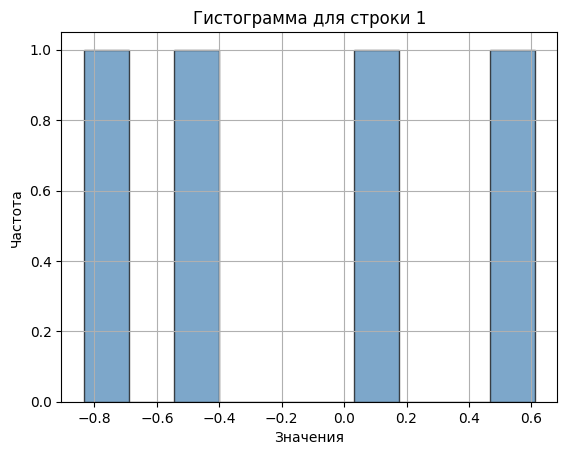

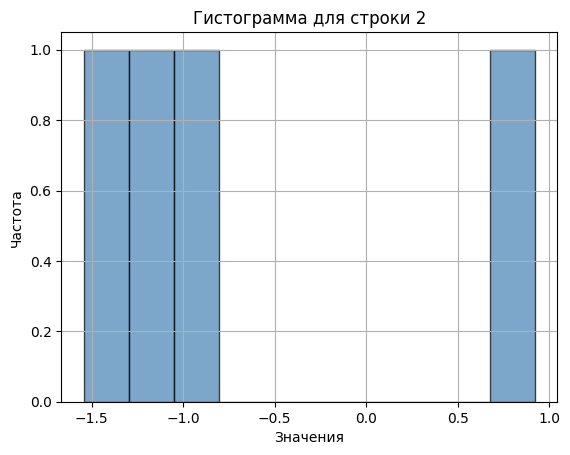

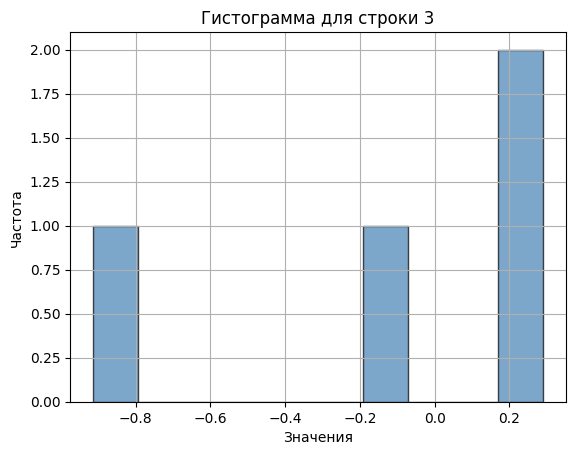

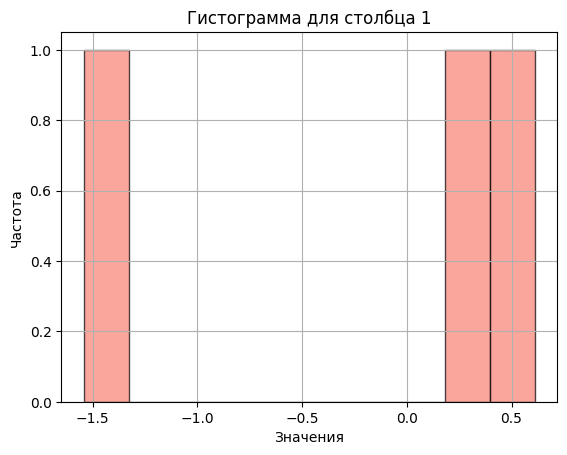

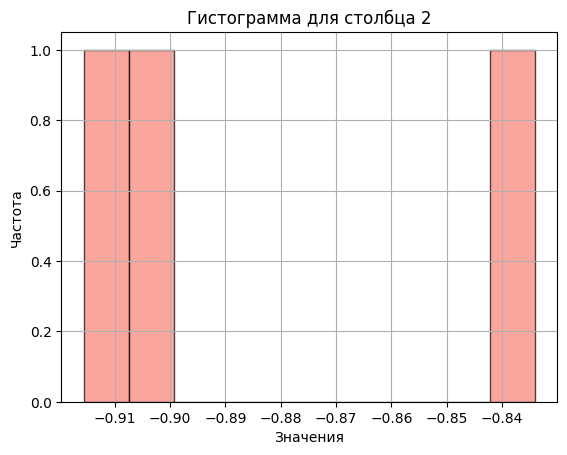

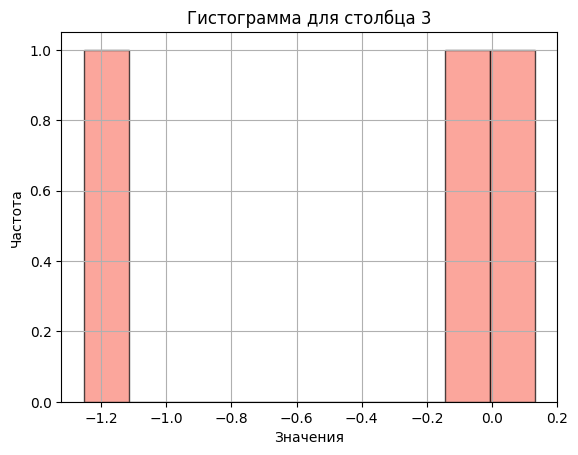

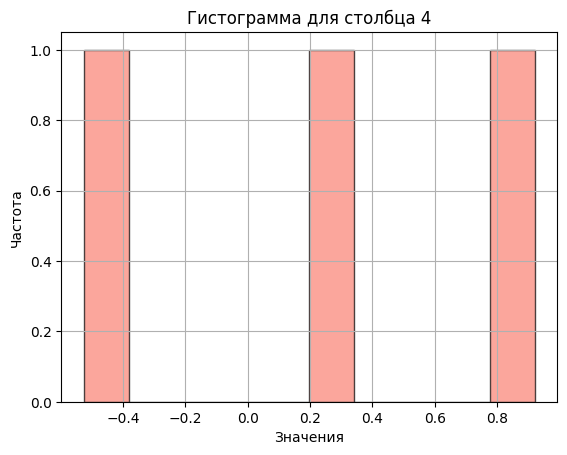

Матрица:
 [[ 0.6107441  -0.83408496  0.13122391 -0.52585428]
 [-1.54264714 -0.90499441 -1.25332906  0.92084408]
 [ 0.22952114 -0.91558891 -0.14121125  0.29115062]]

Статистика по строкам:
Строка 1: mean=-0.154, var=0.317
Строка 2: mean=-0.695, var=0.921
Строка 3: mean=-0.134, var=0.231

Статистика по столбцам:
Столбец 1: mean=-0.234, var=0.880
Столбец 2: mean=-0.885, var=0.001
Столбец 3: mean=-0.421, var=0.359
Столбец 4: mean=0.229, var=0.351


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_normal_matrix(m, n, mean=0, std=1, bins=10, show_plots=True):
    matrix = np.random.normal(mean, std, size=(m, n))
    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)
    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)
    row_stats = {i: (row_means[i], row_vars[i]) for i in range(m)}
    col_stats = {j: (col_means[j], col_vars[j]) for j in range(n)}

    if show_plots:
        for i in range(m):
            plt.figure()
            plt.hist(matrix[i, :], bins=bins, alpha=0.7, color='steelblue', edgecolor='black')
            plt.title(f'Гистограмма для строки {i+1}')
            plt.xlabel('Значения')
            plt.ylabel('Частота')
            plt.grid(True)
            plt.show()

        for j in range(n):
            plt.figure()
            plt.hist(matrix[:, j], bins=bins, alpha=0.7, color='salmon', edgecolor='black')
            plt.title(f'Гистограмма для столбца {j+1}')
            plt.xlabel('Значения')
            plt.ylabel('Частота')
            plt.grid(True)
            plt.show()

    return matrix, row_stats, col_stats

if __name__ == "__main__":
    M, rows, cols = analyze_normal_matrix(3, 4, mean=0, std=1)
    print("Матрица:\n", M)
    print("\nСтатистика по строкам:")
    for i, (mean, var) in rows.items():
        print(f"Строка {i+1}: mean={mean:.3f}, var={var:.3f}")
    print("\nСтатистика по столбцам:")
    for j, (mean, var) in cols.items():
        print(f"Столбец {j+1}: mean={mean:.3f}, var={var:.3f}")


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [2]:
import numpy as np

def chess(m, n, a, b):
    M = np.zeros((m, n), dtype=type(a))
    for i in range(m):
        for j in range(n):
            M[i, j] = a if (i + j) % 2 == 0 else b
    return M

def test_chess():
    assert np.array_equal(chess(2, 2, 1, 0), np.array([[1, 0], [0, 1]]))
    assert np.array_equal(chess(3, 3, 5, 9),
                          np.array([[5, 9, 5],
                                    [9, 5, 9],
                                    [5, 9, 5]]))
    assert np.array_equal(chess(1, 4, 7, 8), np.array([[7, 8, 7, 8]]))

if __name__ == "__main__":
    test_chess()



<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

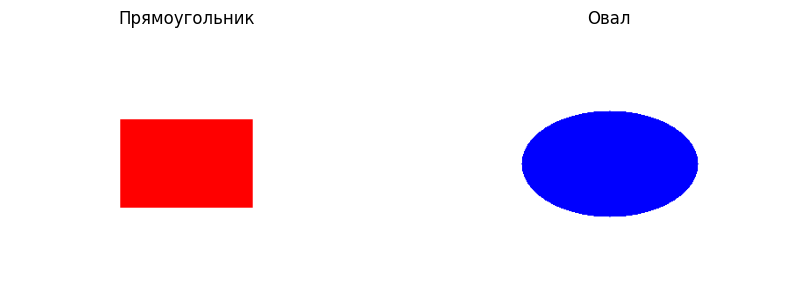

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    img = np.full((m, n, 3), background_color, dtype=np.uint8)

    y0, x0 = m // 2, n // 2  # центр изображения
    y1, y2 = y0 - a // 2, y0 + a // 2
    x1, x2 = x0 - b // 2, x0 + b // 2

    img[y1:y2, x1:x2] = rectangle_color
    return img


def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    img = np.full((m, n, 3), background_color, dtype=np.uint8)
    y, x = np.ogrid[:m, :n]
    y0, x0 = m // 2, n // 2  # центр изображения

    # Уравнение эллипса: ((x - x0)^2 / b^2) + ((y - y0)^2 / a^2) <= 1
    mask = ((x - x0) ** 2) / (b ** 2) + ((y - y0) ** 2) / (a ** 2) <= 1
    img[mask] = ellipse_color
    return img

rect = draw_rectangle(100, 150, 300, 400, rectangle_color=(255, 0, 0), background_color=(255, 255, 255))
oval = draw_ellipse(60, 100, 300, 400, ellipse_color=(0, 0, 255), background_color=(255, 255, 255))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(rect)
plt.title("Прямоугольник")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(oval)
plt.title("Овал")
plt.axis("off")
plt.show()


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [5]:
import numpy as np

def analyze_time_series(series, p):
    series = np.array(series, dtype=float)
    mean = np.mean(series)
    var = np.var(series)
    std = np.std(series)
    local_max = []
    local_min = []
    for i in range(1, len(series) - 1):
        if series[i] > series[i - 1] and series[i] > series[i + 1]:
            local_max.append((i, series[i]))
        elif series[i] < series[i - 1] and series[i] < series[i + 1]:
            local_min.append((i, series[i]))

    if p <= 0 or p > len(series):
        raise ValueError("Размер окна p должен быть >0 и ≤ длине ряда")
    
    moving_avg = np.convolve(series, np.ones(p)/p, mode='valid')

    return {
        "mean": mean,
        "variance": var,
        "std": std,
        "local_max": local_max,
        "local_min": local_min,
        "moving_average": moving_avg
    }

series = [1, 3, 2, 5, 4, 7, 6, 8, 5]
result = analyze_time_series(series, p=3)

print("Математическое ожидание:", result["mean"])
print("Дисперсия:", result["variance"])
print("СКО:", result["std"])
print("Локальные максимумы:", result["local_max"])
print("Локальные минимумы:", result["local_min"])
print("Скользящее среднее:", result["moving_average"])


Математическое ожидание: 4.555555555555555
Дисперсия: 4.6913580246913575
СКО: 2.165954298846436
Локальные максимумы: [(1, 3.0), (3, 5.0), (5, 7.0), (7, 8.0)]
Локальные минимумы: [(2, 2.0), (4, 4.0), (6, 6.0)]
Скользящее среднее: [2.         3.33333333 3.66666667 5.33333333 5.66666667 7.
 6.33333333]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [7]:
import numpy as np

def one_hot_encode(labels):
    labels = np.array(labels, dtype=int)
    num_classes = np.max(labels) + 1
    one_hot = np.zeros((len(labels), num_classes), dtype=int)
    one_hot[np.arange(len(labels)), labels] = 1
    return one_hot

def test_one_hot_encode():
    # Базовый случай
    labels = [0, 1, 2]
    expected = np.array([[1,0,0],
                         [0,1,0],
                         [0,0,1]])
    assert np.array_equal(one_hot_encode(labels), expected)

    # Повторяющиеся метки
    labels = [2, 2, 0]
    expected = np.array([[0,0,1],
                         [0,0,1],
                         [1,0,0]])
    assert np.array_equal(one_hot_encode(labels), expected)

    # Единичный класс
    labels = [0, 0, 0]
    expected = np.array([[1],
                         [1],
                         [1]])
    assert np.array_equal(one_hot_encode(labels), expected)


if __name__ == "__main__":
    test_one_hot_encode()

